# Clustering Drugs and Classes

In [11]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

from sklearn.cluster import KMeans

In [2]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2014_V3.csv')
df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change,changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,10,2014,NaN,2014_10,NaN,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,11,2014,6.0,2014_11,0.00000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,12,2014,22.0,2014_12,0.00000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,0.00000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,2,2015,15.0,2015_02,0.00000,0
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,3,2015,33.0,2015_03,0.00000,0
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,4,2015,47.0,2015_04,0.00000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,5,2015,36.0,2015_05,0.08904,1
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,6,2015,54.0,2015_06,0.00000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,7,2015,55.0,2015_07,0.00000,0


In [3]:
df = df[df.Year != 2020]

## Based on TRX

In [4]:
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,2590.0,NaN,1419308.0,559.0,77731.0,34008.0,80851.0,927023.0,4740.0,78288.0,...,5803135.0,705004.0,NaN,5788.0,155.0,1871470.0,543747.0,273977.0,61659.0,1052.0
2014_09,2865.0,NaN,1479415.0,617.0,75847.0,34105.0,84698.0,947541.0,4665.0,80983.0,...,6194971.0,706012.0,NaN,6000.0,124.0,1889276.0,545202.0,437213.0,48981.0,1158.0
2014_10,2656.0,NaN,1569909.0,594.0,84794.0,35069.0,82018.0,948974.0,4580.0,84325.0,...,6426457.0,726187.0,NaN,6244.0,131.0,1938759.0,564256.0,776294.0,43253.0,1160.0
2014_11,2503.0,NaN,1411803.0,619.0,87516.0,32128.0,44888.0,858943.0,4170.0,76945.0,...,5941924.0,657099.0,NaN,5404.0,137.0,1788978.0,516835.0,515860.0,41046.0,1004.0
2014_12,3078.0,NaN,1508548.0,1389.0,101306.0,35810.0,47736.0,921016.0,4430.0,175874.0,...,6810177.0,744866.0,NaN,6498.0,175.0,3898129.0,570719.0,431897.0,53042.0,1221.0


In [20]:
cluster_df = trx.transpose().dropna()
X = cluster_df.values

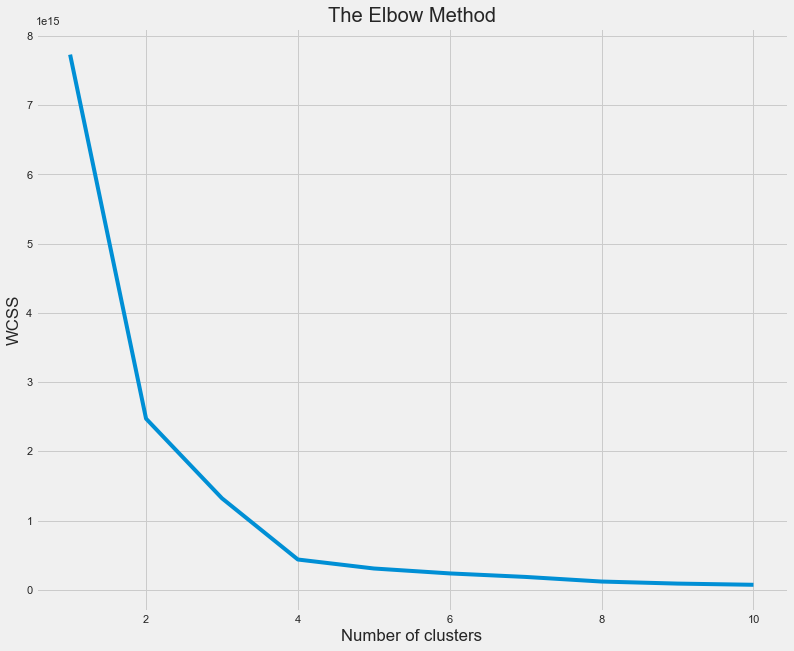

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [24]:
cluster_df['cluster'] = y_kmeans

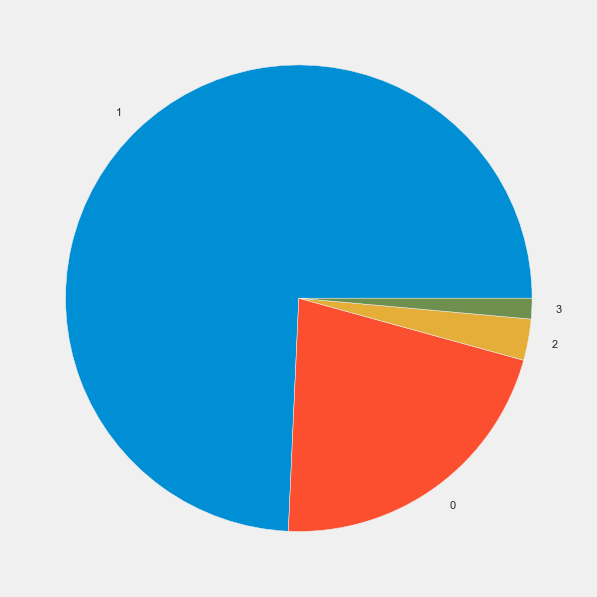

In [30]:
plt.pie(cluster_df.cluster.value_counts(), labels=cluster_df.cluster.value_counts().index)
plt.show()

In [34]:
pd.set_option('display.max_rows', None)
cluster_df['cluster'].to_frame()

,cluster
Major Class,
A.C.T.H.,1
ADHD,0
ALL OTHER RESPIRATORY,1
ALL OTHER THERAPEUTICS,1
ALL OTHER UROLOGICAL,1
"ALLERGY, SYSTEMIC & NASAL",1
ANTI-ALZHEIMERS,1
"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",1
ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,1
